In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
print("Setup Complete")

Setup Complete


In [2]:
test_path = "/kaggle/input/big-mart-data/9961_14084_bundle_archive/Test.csv"
train_path = "/kaggle/input/big-mart-data/9961_14084_bundle_archive/Train.csv"

df1 = pd.read_csv(test_path)
df2 = pd.read_csv(train_path)

In [3]:
#Merge Two data sets
train_data = pd.concat([df2, df1])
train_data.shape

(14204, 12)

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [6]:
train_data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# **Handling Missing values**

> We found two variables with missing values: *Item_Weight* & *Outlet_Size*

In [8]:
#How many missing data points do we have in %?
missing_values_count = train_data.isnull().sum()

total_missing = missing_values_count.sum() 
total_cells = np.product(train_data.shape)

percent_missing = (total_missing/total_cells) * 100
print(percent_missing,"%")

7.120060076973623 %


In [9]:
#Check for duplicates
duplicate = train_data.duplicated()
print(duplicate.sum())

0


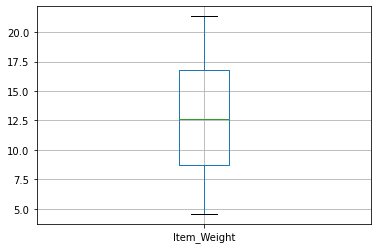

In [10]:
#Checking if there is Outliers in column Item_Weight 
train_data.boxplot(column=["Item_Weight"])
plt.show()

In [11]:
#Replacing the NAN values in Item_Weight (numerical column) with Median
Item_Weight_Median = train_data["Item_Weight"].median()

train_data["Item_Weight"].replace(np.nan,Item_Weight_Median,inplace=True)

In [12]:
#Replacing the NAN values in Outlet_Size (categorical column) with mode
Outlet_Size_Mode = train_data["Outlet_Size"].mode().values[0]

train_data["Outlet_Size"]= train_data["Outlet_Size"].replace(np.nan,Outlet_Size_Mode)

In [13]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [14]:
train_data.to_csv("train_clean_1.csv",index = False)